In [330]:
#!/usr/bin/python


import pandas as pd
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)






In [331]:
df = pd.DataFrame(data_dict)

In [332]:
df = df.transpose()

In [333]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [335]:
poi_df = df['poi'].astype(int)


In [336]:
poi_df = pd.DataFrame(poi_df)

In [337]:
poi_df.head()

,poi
ALLEN PHILLIP K,0
BADUM JAMES P,0
BANNANTINE JAMES M,0
BAXTER JOHN C,0
BAY FRANKLIN R,0


In [338]:
df = df.drop('poi', axis = 1)

In [339]:
#remove text feature
email_df = df['email_address'].astype(str)

In [340]:
df = df.drop('email_address', axis = 1)

In [341]:
#df1 = df.where(df == 'NaN', df.median(), axis='columns')
df = df.replace('NaN',0.0000000001)

In [342]:
df.apply(pd.to_numeric)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,2.869717e+06,-3.081055e+06,1.000000e-10,1.729541e+06,1.386800e+04,2.195000e+03,4.700000e+01,6.500000e+01,1.000000e-10,3.048050e+05,1.520000e+02,1.260270e+05,-1.260270e+05,2.019550e+05,1.407000e+03,2.902000e+03,4.484442e+06,1.729541e+06
BADUM JAMES P,1.000000e-10,1.789800e+05,1.000000e-10,1.000000e-10,2.578170e+05,3.486000e+03,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.824660e+05,2.578170e+05
BANNANTINE JAMES M,1.000000e-10,1.000000e-10,-5.104000e+03,1.000000e-10,4.046157e+06,5.630100e+04,2.900000e+01,3.900000e+01,0.000000e+00,1.000000e-10,1.000000e-10,8.645230e+05,1.757552e+06,-5.602220e+05,4.770000e+02,4.650000e+02,5.660000e+02,9.161970e+05,5.243487e+06
BAXTER JOHN C,1.200000e+06,1.295738e+06,-1.386055e+06,1.000000e-10,6.680544e+06,1.120000e+04,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.586055e+06,2.660303e+06,3.942714e+06,1.000000e-10,2.671020e+05,1.000000e-10,1.000000e-10,5.634343e+06,1.062326e+07
BAY FRANKLIN R,4.000000e+05,2.604550e+05,-2.016410e+05,1.000000e-10,1.000000e-10,1.291420e+05,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.900000e+01,1.457960e+05,-8.278200e+04,2.396710e+05,1.000000e-10,1.000000e-10,8.276960e+05,6.301400e+04
BAZELIDES PHILIP J,1.000000e-10,6.846940e+05,1.000000e-10,1.000000e-10,1.599641e+06,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,9.375000e+04,8.740000e+02,1.000000e-10,1.000000e-10,8.081800e+04,1.000000e-10,1.000000e-10,8.601360e+05,1.599641e+06
BECK SALLY W,7.000000e+05,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,3.717200e+04,4.343000e+03,1.440000e+02,3.860000e+02,1.000000e-10,1.000000e-10,5.660000e+02,1.260270e+05,1.000000e-10,2.313300e+05,2.639000e+03,7.315000e+03,9.690680e+05,1.260270e+05
BELDEN TIMOTHY N,5.249999e+06,2.144013e+06,-2.334434e+06,1.000000e-10,9.531360e+05,1.735500e+04,4.840000e+02,2.280000e+02,1.080000e+02,1.000000e-10,1.000000e-10,2.106980e+05,1.575690e+05,1.000000e-10,2.139990e+05,5.521000e+03,7.991000e+03,5.501630e+06,1.110705e+06
BELFER ROBERT,1.000000e-10,-1.025000e+05,1.000000e-10,3.285000e+03,3.285000e+03,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.409300e+04,1.000000e-10,1.000000e-10,1.000000e-10,1.025000e+05,-4.409300e+04
BERBERIAN DAVID,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.624396e+06,1.189200e+04,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,8.692200e+05,1.000000e-10,2.165820e+05,1.000000e-10,1.000000e-10,2.284740e+05,2.493616e+06


In [343]:
print("Find most important features relative to target")
df.corrwith(poi_df['poi'])

Find most important features relative to target


bonus                        0.023755
deferral_payments           -0.040409
deferred_income             -0.039544
director_fees               -0.061388
exercised_stock_options      0.040315
expenses                    -0.009456
from_messages               -0.032633
from_poi_to_this_person      0.192621
from_this_person_to_poi      0.131008
loan_advances                0.131789
long_term_incentive          0.012886
other                        0.022233
restricted_stock             0.015209
restricted_stock_deferred   -0.005362
salary                      -0.000627
shared_receipt_with_poi      0.243313
to_messages                  0.111262
total_payments               0.049777
total_stock_value            0.034462
dtype: float64

It appears that the following have the highest correlations:
shared_receipt_with_poi      0.243313
from_poi_to_this_person      0.192621
from_this_person_to_poi      0.131008
loan_advances                0.131789
to_messages                  0.111262

Let's evaluate with kbest


In [344]:
from IPython.display import display # Allows the use of display() for DataFrames

In [345]:
%matplotlib inline

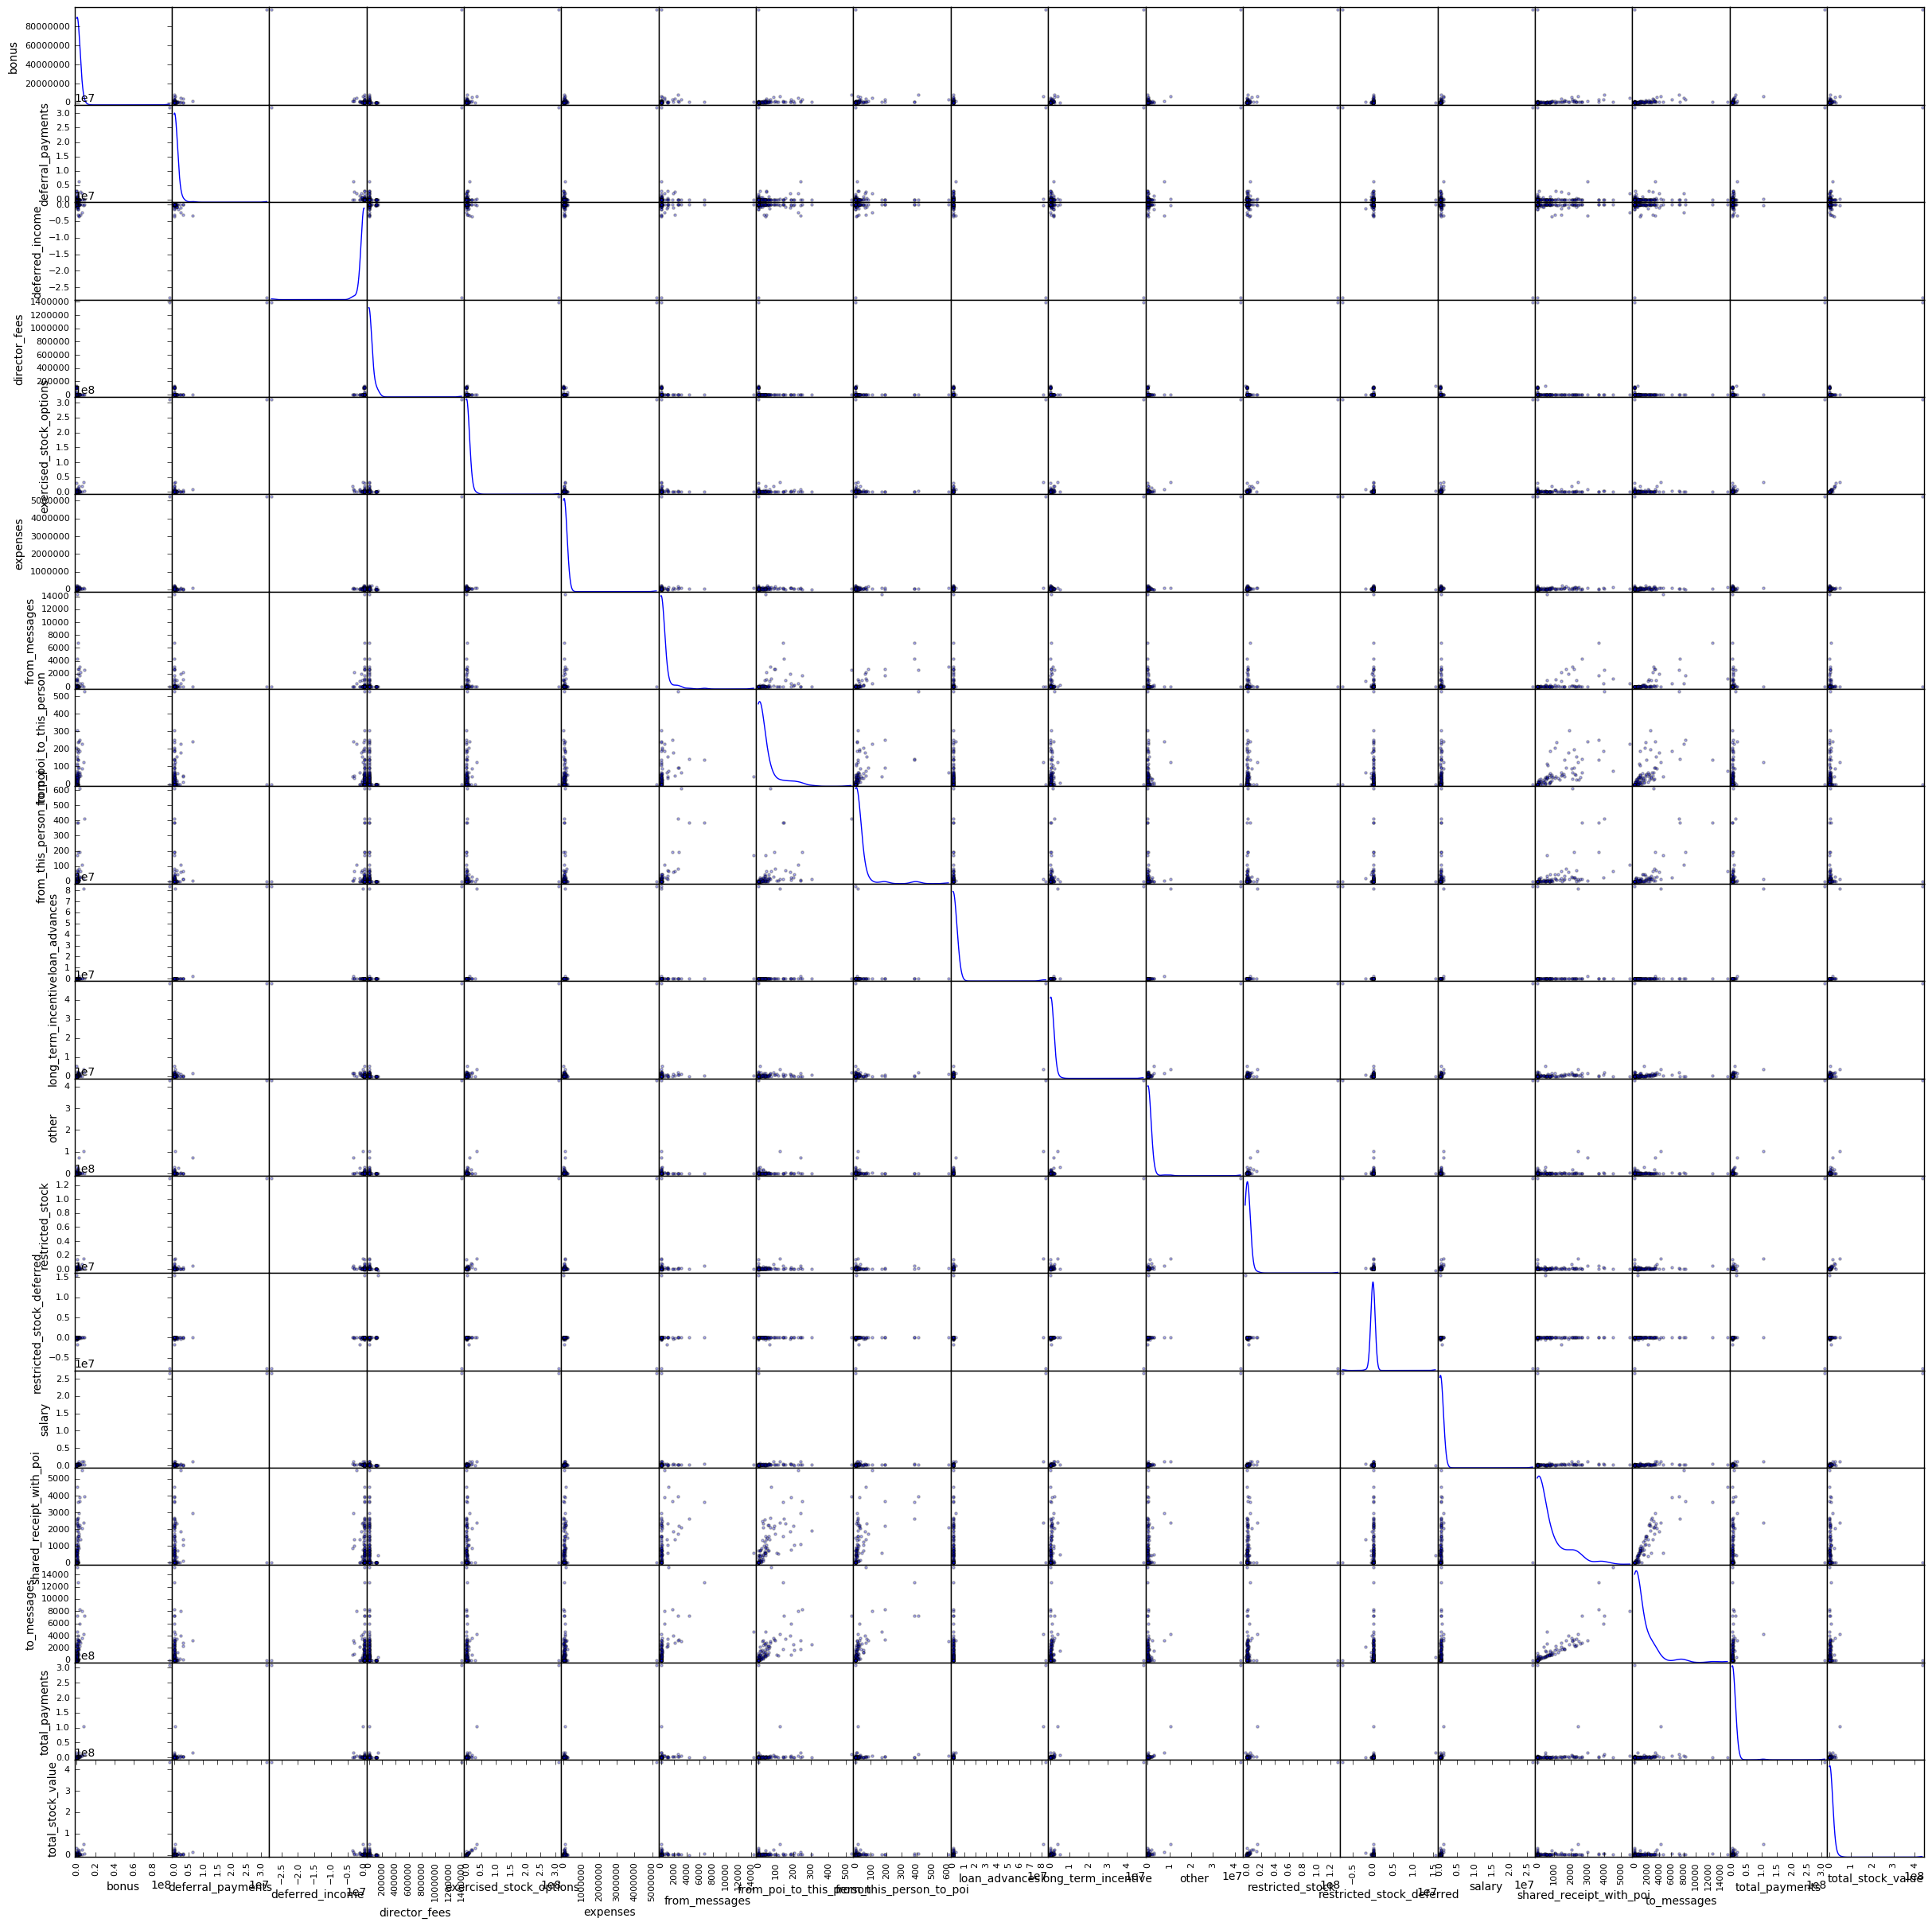

In [346]:
pd.scatter_matrix(df, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

In [347]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
selector = SelectKBest(score_func=f_classif, k=5).fit(df, poi_df)
idxs_selected = selector.get_support(indices=True)
features_dataframe_new = df[idxs_selected]

# Get the raw p-values for each feature, and transform from p-values into scores
scores = selector.scores_

print features_dataframe_new.columns

Index([u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'shared_receipt_with_poi', u'to_messages'],
      dtype='object')


Interesting that SelectKBest returned the items with the highest correlation.  I will go with those but I will also conduct a feature union with SelectKBest and PCA to see if there are any clusters that could lead to new features.

In [348]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [349]:
selection = SelectKBest()

In [350]:
pca = PCA()

In [351]:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [352]:
rfc = RandomForestClassifier()

In [353]:
pipeline = Pipeline([("features", combined_features), ("rfc", rfc)])

In [354]:
param_grid = dict(features__pca__n_components=range(1,11),
                  features__univ_select__k=range(1,6),
                  rfc__min_samples_leaf = [25, 50])

In [355]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(df, poi_df['poi'])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1, score=0.875000, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1, score=0.875000, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2, score=0.875000, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2, score=0.875000, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=3 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=3, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=3 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=3, score=0.877551, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=3 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=3, score=0.875000, total=   0.0s
[CV] features__pca__n_components=1,

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   17.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=10, score_func=<function f_classif at 0x000000000BAE9D68>))],
       tra...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'features__pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rfc__min_samples_leaf': [25, 50], 'features__univ_select__k': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [356]:
print(grid_search.best_estimator_)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=1, score_func=<function f_classif at 0x000000000BAE9D68>))],
       transfo...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])


In [357]:
selection_new = SelectKBest(k=1)
pca_new = PCA(n_components=1)

In [358]:
combined_features_new= FeatureUnion([("pca", pca_new), ("univ_select", selection_new)])

In [359]:
df_new = combined_features_new.fit(df, poi_df).transform(df)

In [360]:
df_new = pd.DataFrame(df_new)

In [361]:
df_new.index = df.index

In [362]:
df_new.head()

,0,1
ALLEN PHILLIP K,-3.746540e+06,1.407000e+03
BADUM JAMES P,-8.439829e+06,1.000000e-10
BANNANTINE JAMES M,-2.569801e+06,4.650000e+02
BAXTER JOHN C,5.512383e+06,1.000000e-10
BAY FRANKLIN R,-8.266819e+06,1.000000e-10


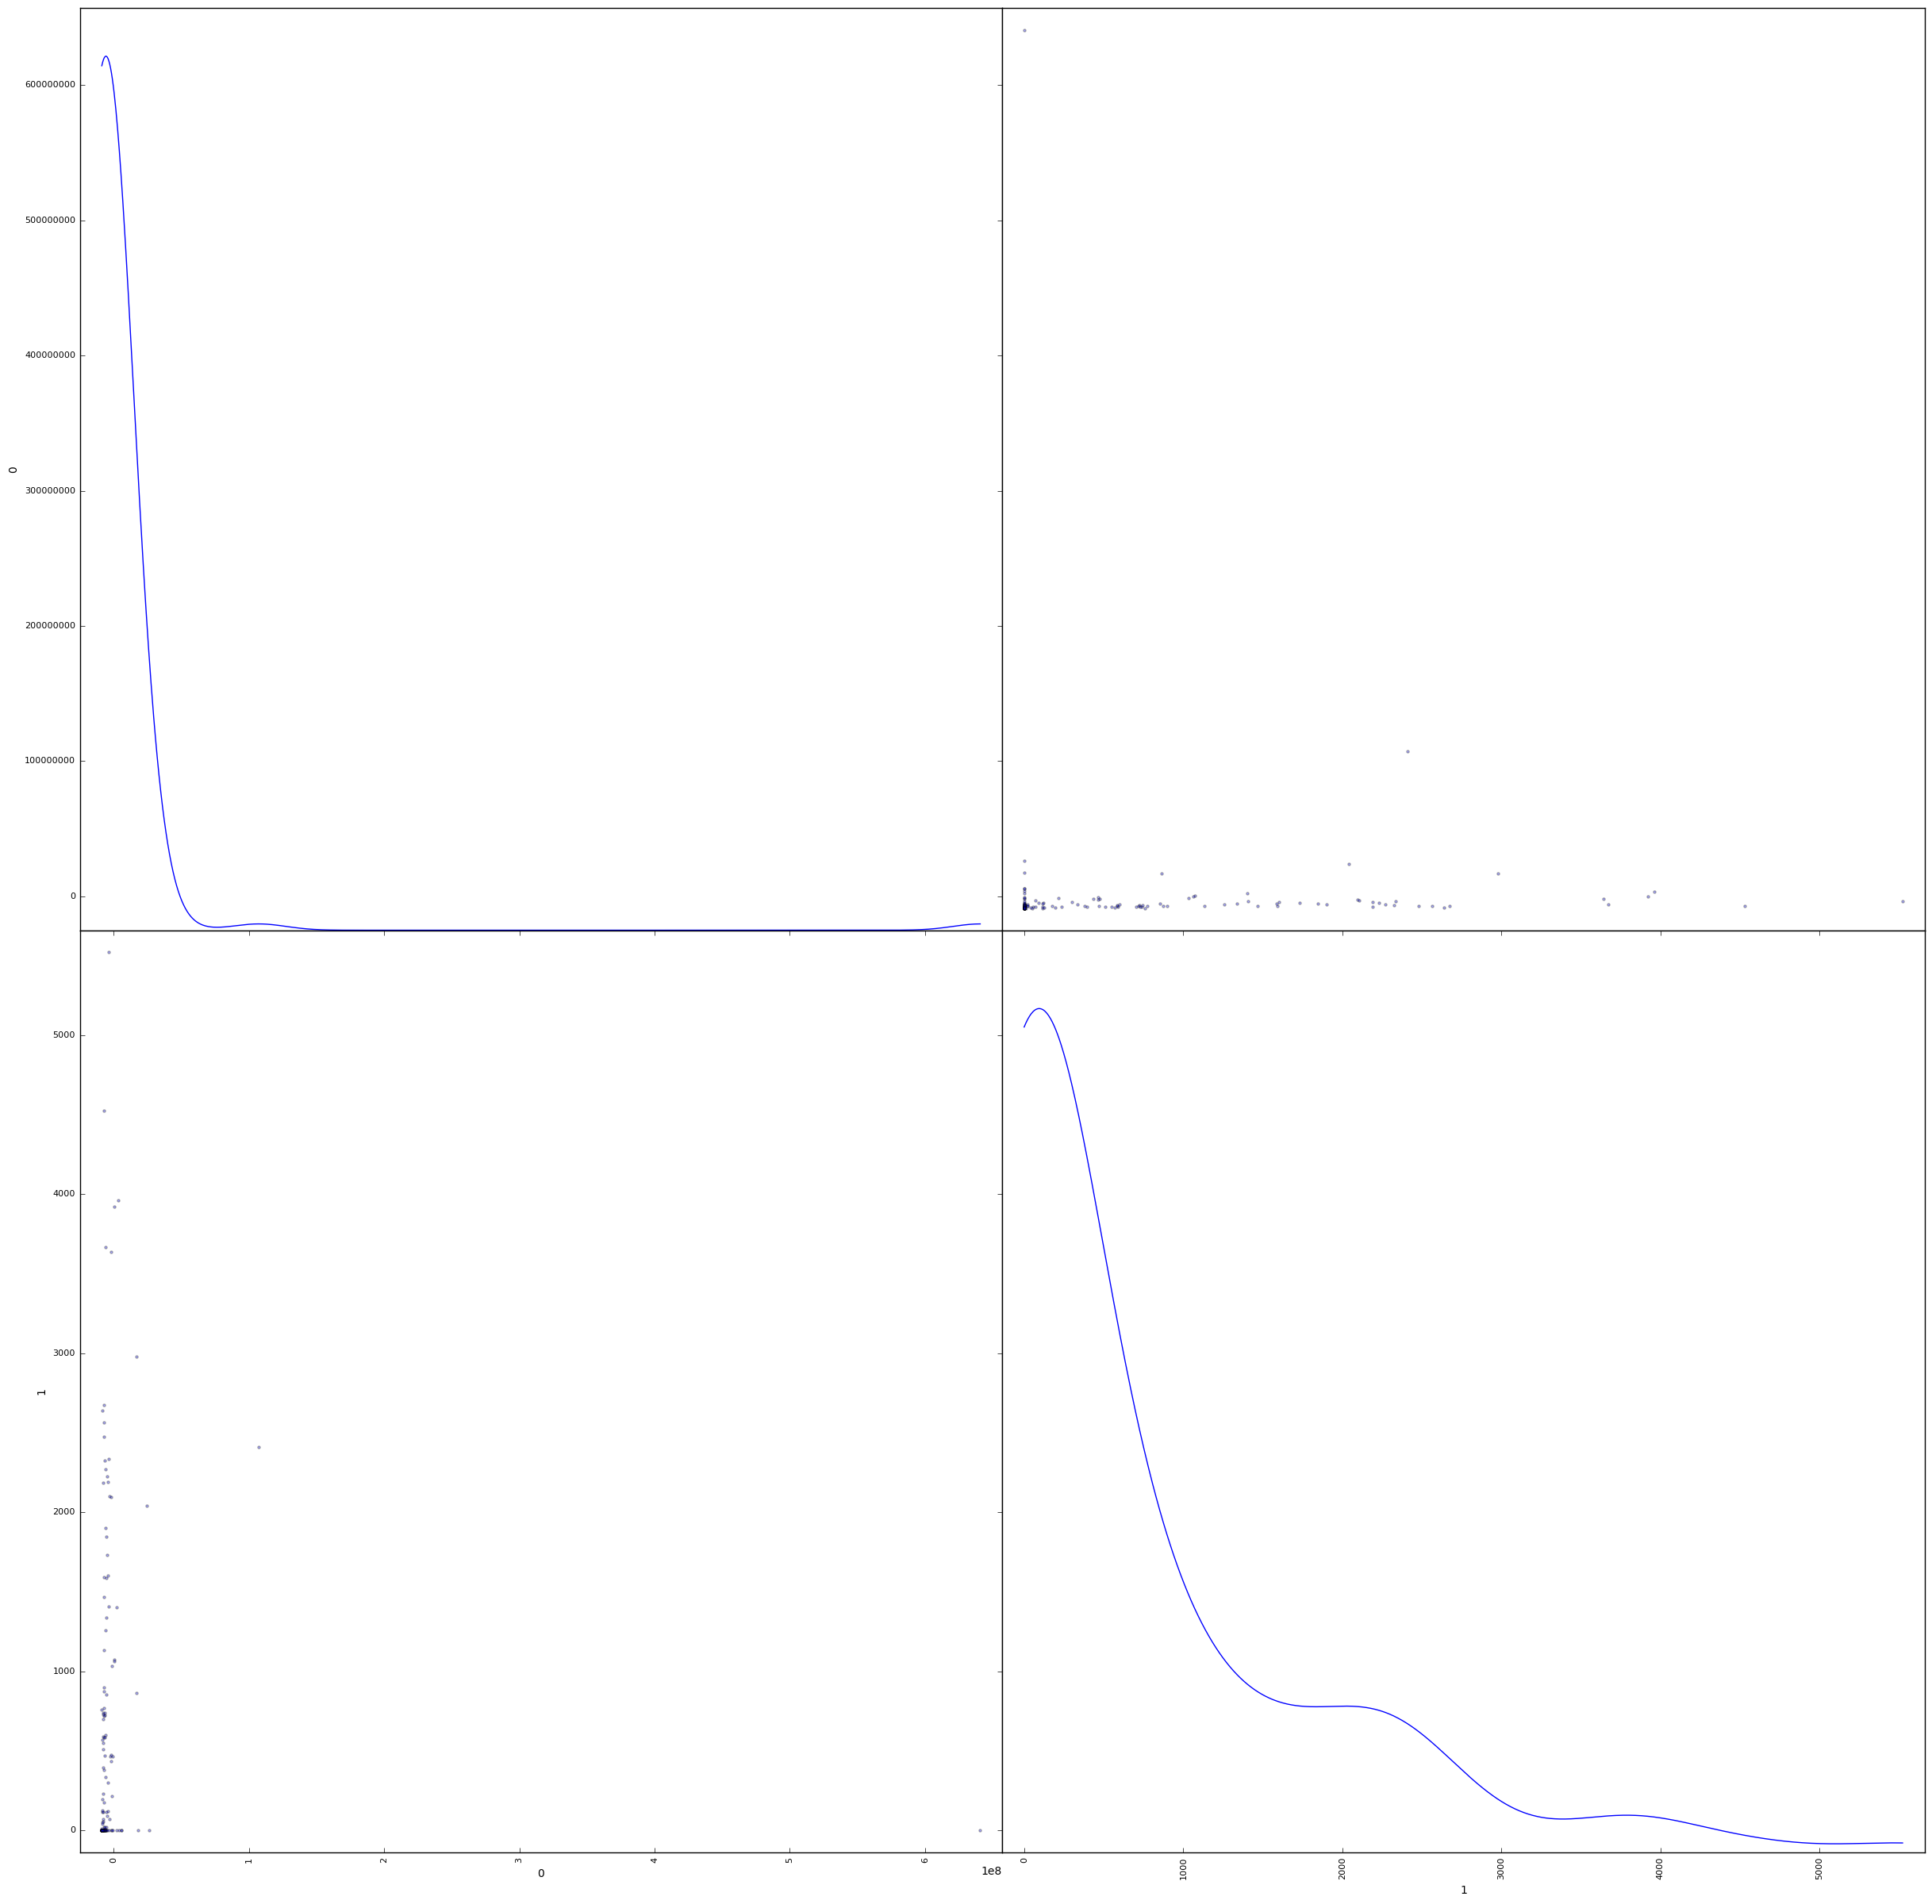

In [363]:
pd.scatter_matrix(df_new, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

In [364]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled)

In [365]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 2 columns):
0    146 non-null float64
1    146 non-null float64
dtypes: float64(2)
memory usage: 3.4+ KB


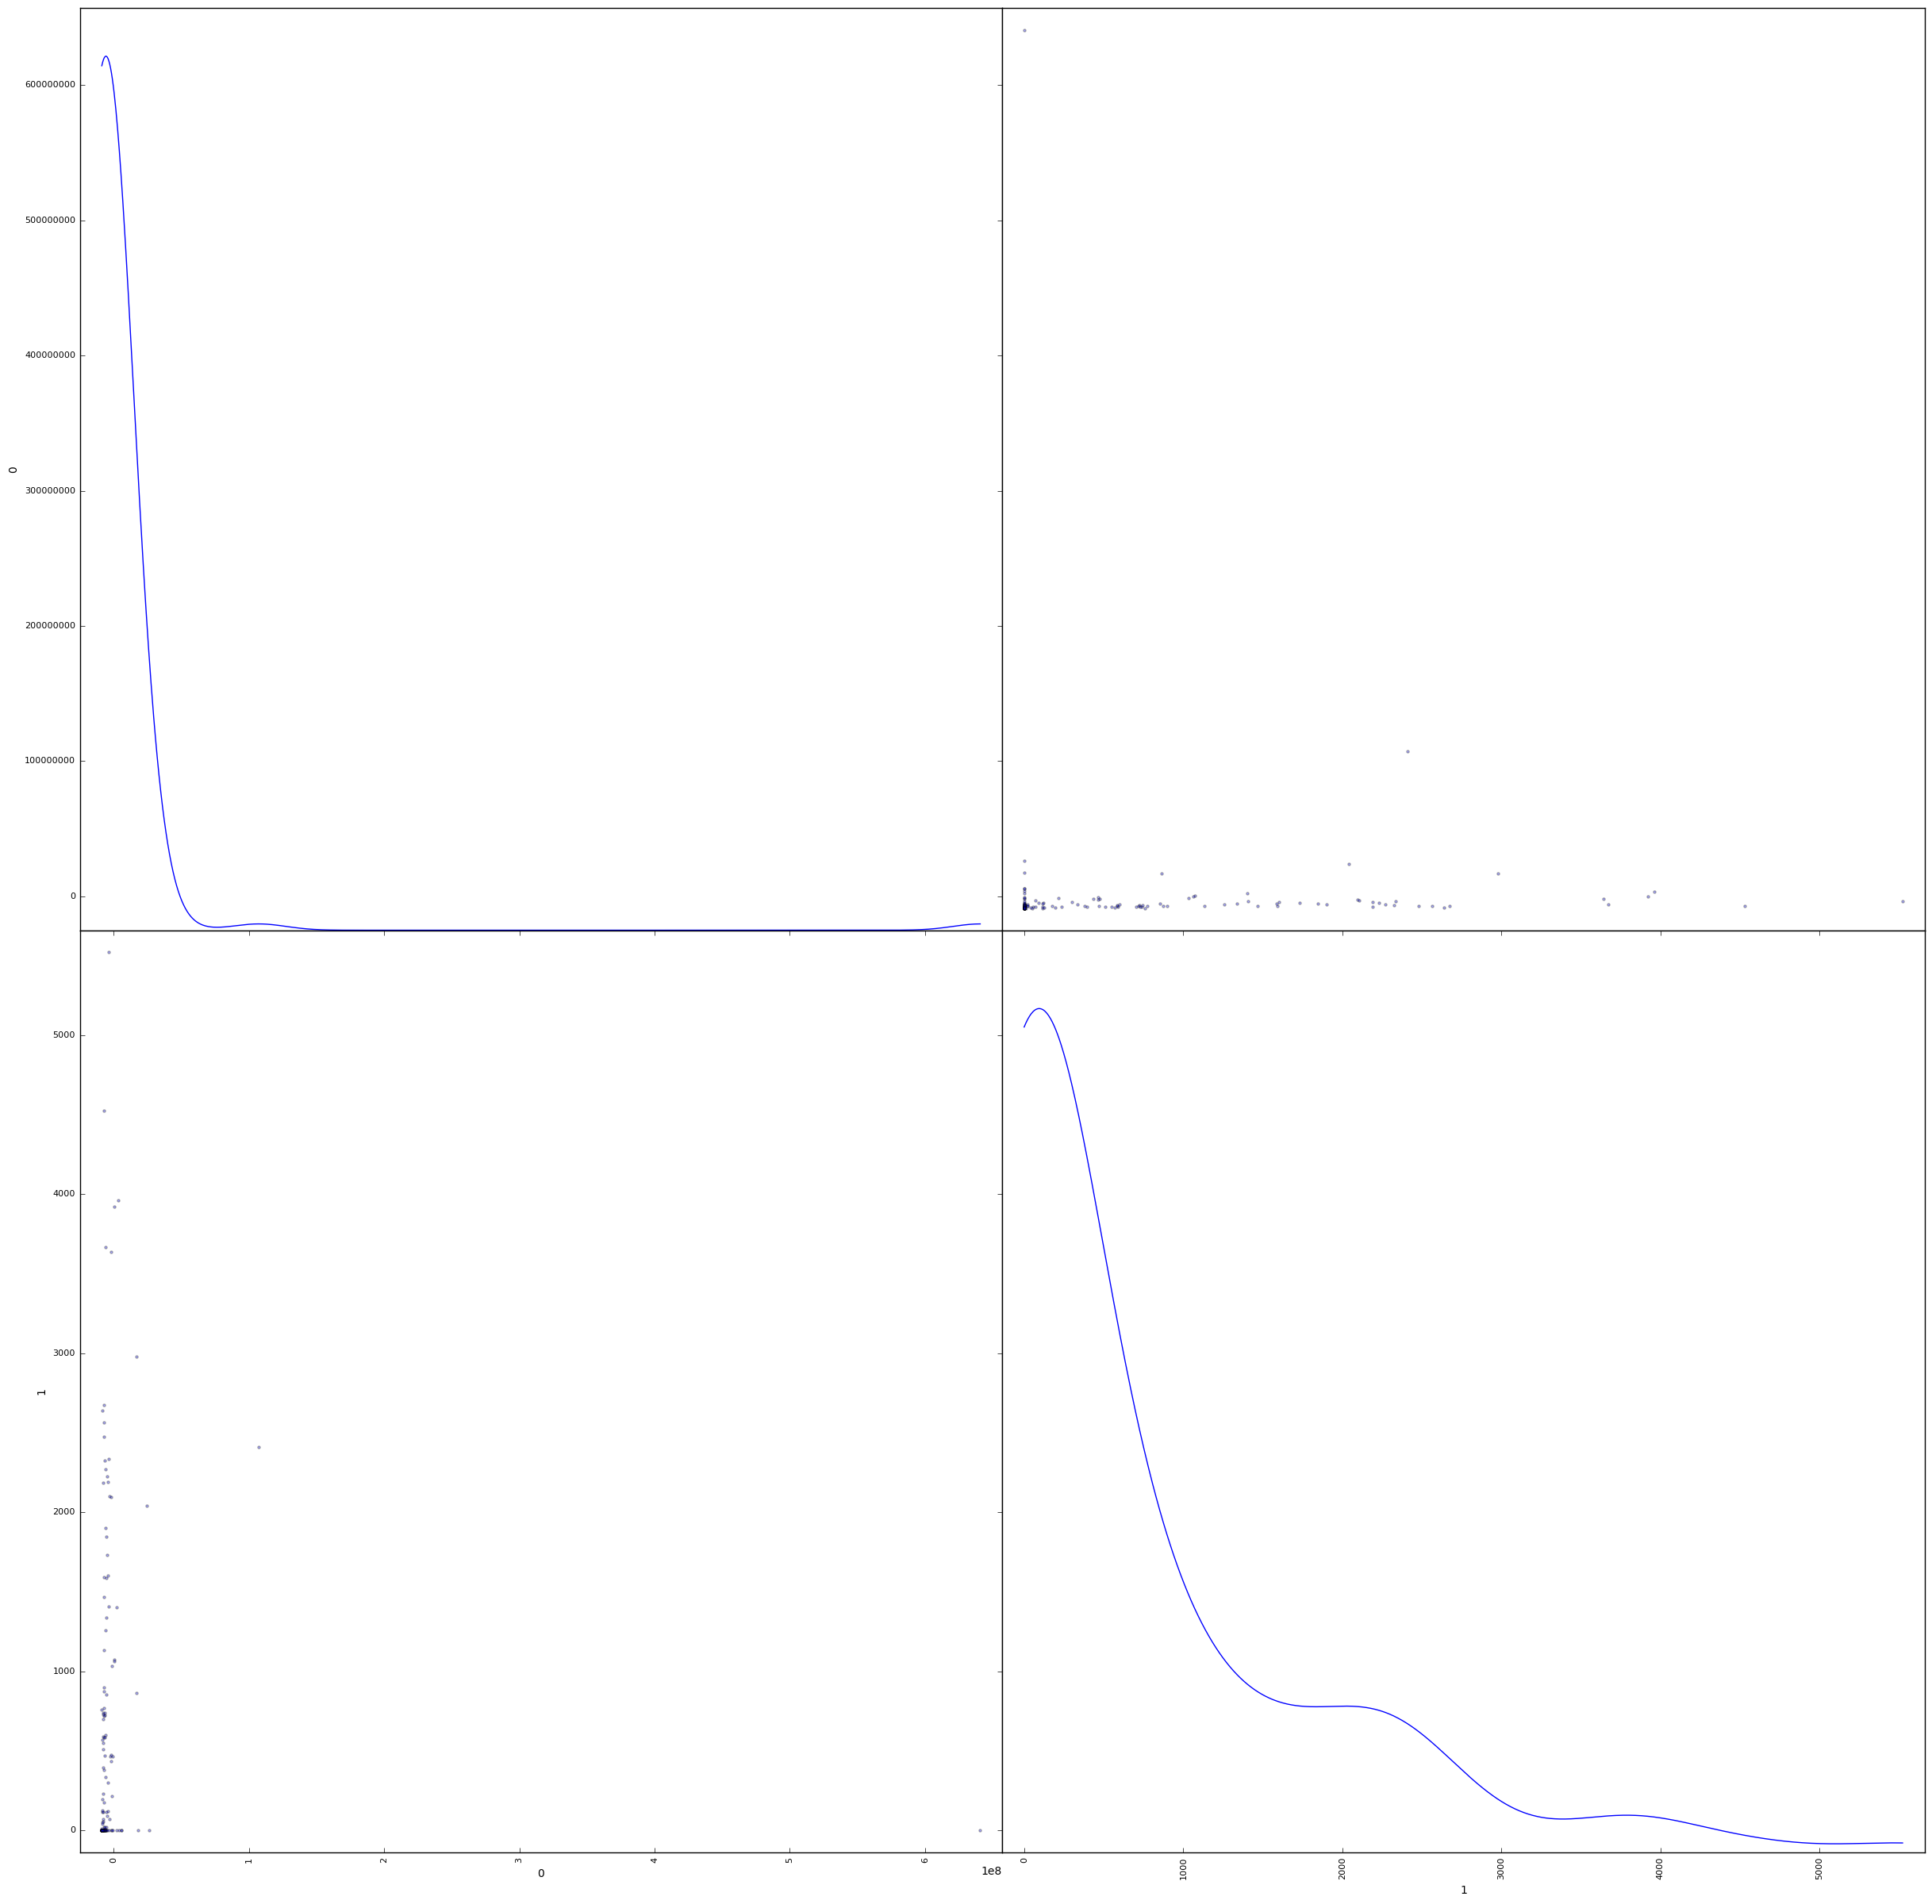

In [366]:
pd.scatter_matrix(df_new, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


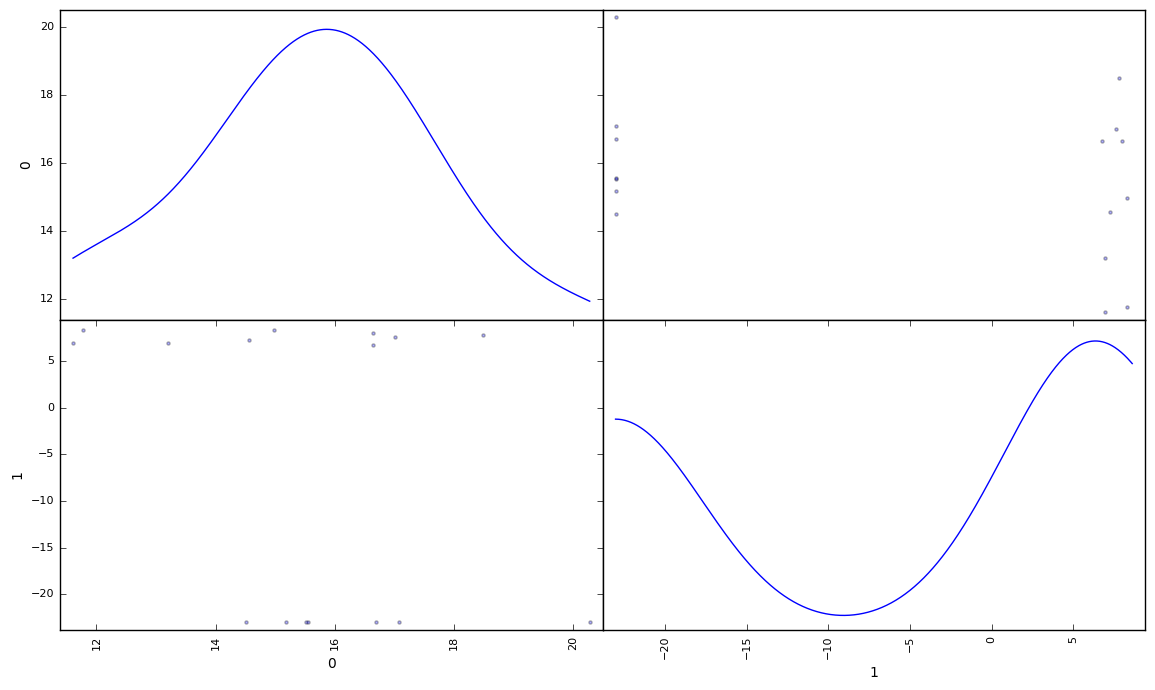

In [367]:
# TODO: Scale the data using the natural logarithm
import math
log_data =  np.log(df_new)
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Describe data shape!

In [369]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(log_data, poi_df, random_state=42)

In [ ]:
pipeline_optimized = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2), stop_words = 'english')),
                               ('tfidf', TfidfTransformer(use_idf = True)), 
                               ('clf', RandomForestClassifier())])

In [296]:
pd.scatter_matrix(X_train, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

AttributeError: 'numpy.ndarray' object has no attribute '_get_numeric_data'

In [137]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
reg = linear_model.Lasso()

reg.fit(features_train, labels_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
features_train_pred = reg.predict(features_train)
features_test_pred  = reg.predict(features_test)
print "accuracy score train:", 
print "r2 score train:", reg.score(features_train, labels_train)

print "accuracy score test:",
print "r2 score test:", reg.score(features_test, labels_test)


accuracy score train: r2 score train: 0.375473364369
accuracy score test: r2 score test: -9.90441543995


In [61]:
#Scale features prior to PCA and feature selection
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [142]:
print "slope:", reg.coef_
print "intercept:", reg.intercept_

#overfitting = lower score on test data!

slope: [ -2.40984676e-08  -1.79920293e-07  -2.39617230e-07  -1.25467522e-06
   1.11393147e-08   5.64803602e-07  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -6.17351066e-09  -3.26978872e-08  -2.55201310e-08
  -9.09232056e-09   3.24256139e-07  -7.15764672e-08   1.92004612e-04
  -6.86345658e-05   1.32361577e-08   2.99497815e-09]
intercept: [ 0.08957137]


bonus                       -2.409847e-08
deferral_payments           -1.799203e-07
deferred_income             -2.396172e-07
director_fees               -1.254675e-06
exercised_stock_options      1.113931e-08
expenses                     5.648036e-07
from_messages               -0.000000e+00
from_poi_to_this_person      0.000000e+00
from_this_person_to_poi     -0.000000e+00
loan_advances               -6.173511e-09
long_term_incentive         -3.269789e-08
other                       -2.552013e-08
restricted_stock            -9.092321e-09
restricted_stock_deferred    3.242561e-07
salary                      -7.157647e-08
shared_receipt_with_poi      1.920046e-04
to_messages                 -6.863457e-05
total_payments               1.323616e-08
total_stock_value            2.994978e-09
dtype: float64


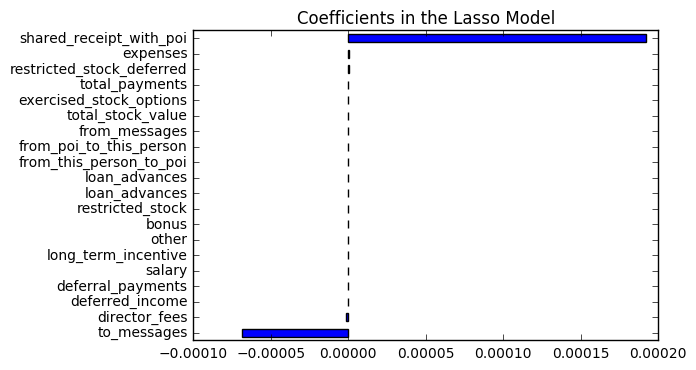

In [159]:
import matplotlib.pyplot as plt
coefs = pd.Series(reg.coef_, index = features_train.columns)
keeper = str(sum(coefs != 0))
print coefs

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

There are two big univariate feature selection tools in sklearn: SelectPercentile and SelectKBest. The difference is pretty apparent by the names: SelectPercentile selects the X% of features that are most powerful (where X is a parameter) and SelectKBest selects the K features that are most powerful (where K is a parameter).

In [ ]:
### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [ ]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.htmldation.StratifiedShuffleSplit.html

In [ ]:


# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)